### Logistic Regression

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook as tqdm
import time

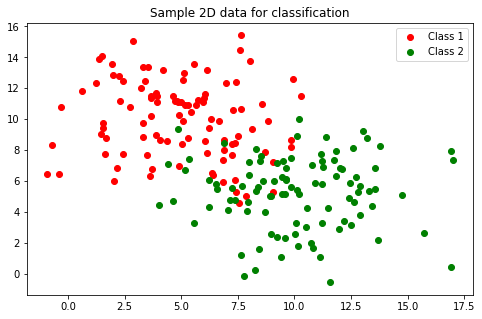

In [2]:
# Synthetic data
mul1 = np.array([5,10])
mul2 = np.array([10,5])
sigma = np.array([[7,0],[0,7]])
X1 = np.random.multivariate_normal(mul1, sigma, 100)
X2 = np.random.multivariate_normal(mul2, sigma, 100)


# Plot the synthetic data
plt.figure(figsize=(8,5))
plt.plot(X1[:,0],X1[:,1],'ro', label='Class 1')
plt.plot(X2[:,0],X2[:,1],'go', label='Class 2')
plt.title('Sample 2D data for classification')

plt.legend()
plt.show()

**Logistic Regression model**

- Training set: Data are pairs $\mathbf{x}^{(i)}, y^{(i)}$ with $\mathbf{x}^{(i)} \in \mathbb{R}^n$ and
   $y = \{0,1\}$ (*Binary classification*)
   
$$\mathcal{X} = 
\begin{bmatrix} 
1 & x_{1}^{1} & x_{1}^{2}& .. & x_{1}^{n} \\ 
1 &x_{2}^{1} & x_{2}^{2}& .. & x_{2}^{n} \\ 
: & : & : & .. & : \\
1 & x_{m}^{1} & x_{m}^{2}& .. & x_{m}^{n} \\
\end{bmatrix};
\mathcal{Y} = 
\begin{bmatrix}
y_{1} \\
y_{2} \\
: \\
y_{m} \\
\end{bmatrix} 
$$

- Structure of model (*sigmoid function*):

$$h_\theta(\textbf{x}) = \frac{1}{1+e^{-\theta^\top \mathbf{x}}}$$

- Cost function (*Binary Cross Entropy cost function*):

$$ J(\theta) = - \sum_{i=1}^m y^{(i)}\log h_\theta(\mathbf{x}^{(i)}) + (1-y^{(i)})\log(1-h_\theta(\textbf{x}^{(i)})) .$$

- Optimal solution (*use gradient descent to find $\theta$ minimizing $J(\theta)$*)

$$ \theta^{(j+1)} \leftarrow \theta^{(j)} + \alpha(y^{(i)} - h_\theta(\textbf{x}^{(i)}))\textbf{x}^{(i)} .$$


In [3]:
X = np.concatenate((np.ones((200,1)),np.concatenate((X1,X2),0)),1)
y = np.concatenate((np.zeros((100,1)), np.ones((100,1))),0)

In [4]:
# Logistic regression model

def sigmoid(z):
    return 1.0/(1 + np.exp(z))

def crossentropy(X,y,theta,alpha):
    yhat = sigmoid(-X @ theta)
    cost = - (y * np.log(yhat) + (1- y ) * np.log(1-yhat)).mean()
    grad_cost = X.T @ (yhat - y)
    return cost, grad_cost

def logistic_fit(X,y,epochs,alpha):
    theta = np.zeros((3,1))
    costs = []
    for epoch in tqdm(range(epochs),desc='Progress bar'):
        cost,grad_cost = crossentropy(X,y,theta,alpha)
        costs.append(cost)
        theta = theta - alpha*grad_cost
    return costs, theta

def predict(X,theta):
    yhat = sigmoid(-X @ theta)
    preds = np.where(yhat>=0.5,1,0)
    return preds

def accuracy(X,y,theta):
    yhat = sigmoid(-X @ theta)
    preds = np.where(yhat>=0.5,1,0)
    acc = (preds == y).sum()/y.shape[0]
    return acc*100

Progress bar:   0%|          | 0/1000 [00:00<?, ?it/s]

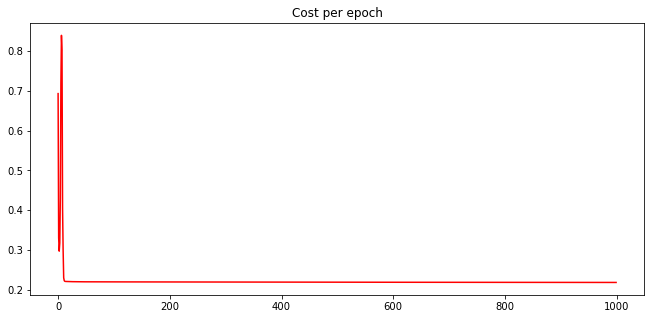

In [5]:
costs, theta = logistic_fit(X,y,epochs=1000,alpha=0.001)
plt.figure(figsize=(11,5))
plt.plot(np.arange(1000),costs,'r-')
plt.title('Cost per epoch')
plt.show()

In [6]:
acc = accuracy(X,y,theta)
print('Model accuracy:',acc,'%')

Model accuracy: 91.0 %


**The logistic regression decision boundary**

Given optimal $\theta$, we can interpret the vector as defining a line
$$\theta_1 x_1+\theta_2 x_2+\theta_0=0$$
To find any point, given $x_1$, use $x_2 = (-\theta_1 x_1 - \theta_0) / \theta_2$.

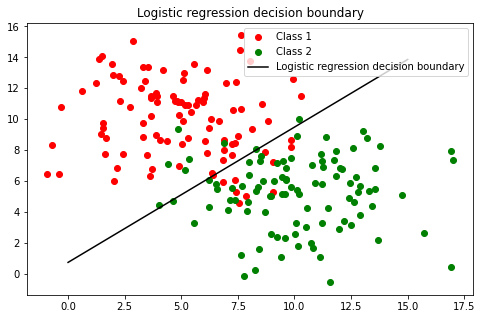

In [10]:
# Plot the synthetic data
plt.figure(figsize=(8,5))
plt.plot(X[y.reshape(-1)==0,1],X[y.reshape(-1)==0,2],'ro', label='Class 1')
plt.plot(X[y.reshape(-1)==1,1],X[y.reshape(-1)==1,2],'go', label='Class 2')
plt.title('Logistic regression decision boundary')

x11 = 0
x12 = 15
x21 = (- theta[1,0] * x11 - theta[0,0]) / theta[2,0]
x22 = (- theta[1,0] * x12 - theta[0,0]) / theta[2,0]
plt.plot((x11, x12),(x21, x22),'k-',label='Logistic regression decision boundary')

plt.legend()
plt.show()